**THEORY QUESTIONS:-**

**Question 1:  What is Anomaly Detection? Explain its types (point,contextual, and collective anomalies) with examples.**

**ANS:-**
Anomaly detection is the identification of rare, unexpected data points or patterns that deviate significantly from the majority of a dataset, often signaling fraud, errors, or security breaches. It filters "noise" to find meaningful, non-conforming, or suspicious behavior.

**Types of Anomalies with Examples:-**

1)Point Anomalies (Global Outliers):-
-A single, individual data point is drastically different from the entire dataset.

Example: A credit card transaction of $10,000  when the user's typical spending is under $100.

Example: A sudden spike in temperature sensors, showing 100Celsius when normal readings are 50Celsius.

2)Contextual Anomalies (Conditional Outliers):-
-Data points that appear normal in isolation but are abnormal within a specific, context-dependent situation (e.g., time, location).

Example: High electricity consumption at 2:00 AM might be normal for a factory but is an anomaly for a residential home.

Example:85Fahrenheit it is normal in summer but considered anomalous during winter.

3)Collective Anomalies:-
-A group of data points that, when taken together, are anomalous, even if individual points within the group seem normal.

Example: A Distributed Denial-of-Service (DDoS) attack, where thousands of individual requests seem legitimate but collectively overload a server.

Example: A slow, steady decrease in daily data transfer rates over a week, where no single day looks unusual, but the trend indicates a failure.


**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

**ANS:-**
1)Isolation Forest (IF):-

#Core idea:-

Isolation Forest detects anomalies by isolating observations instead of modeling normal behavior.

Normal data points are dense and require many splits to isolate, whereas anomalies are few and distinct, so they get isolated quickly.

#How it works:-
-Randomly select a feature
-Randomly choose a split value between min and max
-Repeat recursively to build trees
-Measure path length (number of splits needed to isolate a point)

#use cases:-
-Fraud detection
-Network intrusion
-Credit card transactions
-Sensor monitoring

#Limitations
-Less interpretable than distance-based methods
-Performance depends on contamination parameter

2)DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

#Core idea

-DBSCAN detects anomalies as points that do not belong to any dense cluster.

-Instead of labeling clusters first, DBSCAN directly identifies:

-Dense regions → clusters
-Sparse regions → noise (outliers)

#How it works
DBSCAN relies on two parameters:

-ε(epsilon): neighborhood radius

-min_samples: minimum points needed to form a dense region

Points are classified as:
-Core points: dense areas
-Border points: near dense areas
-Noise points: isolated → anomalies

#use cases
-Spatial data
-Geolocation anomalies
-Image segmentation
-Noise-robust clustering

#Limitations
-Sensitive to parameter choice
-Struggles with varying densities
-Distance-based → affected by feature scaling

3)Local Outlier Factor (LOF)

#Core idea

-LOF detects anomalies by comparing local density of a point to the density of its neighbors.

-Instead of global rarity, it focuses on local deviation.

#How it works
-Compute distance to k nearest neighbors
-Estimate local density
-Compare density of a point with its neighbors

#use cases
-Financial fraud
-Network traffic
-Medical anomaly detection
-Datasets with varying densities

#Limitations
-Sensitive to choice of k
-Computationally expensive for large datasets
-Less effective in very high dimensions


**Question 3: What are the key components of a Time Series? Explain each with one example.**

**ANS:-**
The four key components of a time series are trend, seasonality, cyclicity, and irregularity. They represent the long-term direction, repeating fixed-period patterns, economic fluctuations, and random noise in data, respectively. Understanding these enables forecasting by isolating systematic behaviors from random occurrences.

1)Trend (T)::-

-The long-term, consistent upward or downward movement of the data over a long period.

Example: The steady increase in global annual temperatures over the past 50 years.
2)Seasonality (S):-

-Periodic, repetitive patterns that occur within a fixed period (e.g., daily, weekly, or yearly).

Example: A retailer's spike in sales every December due to holiday shopping.

3)Cyclical (C):-

-Long-term, non-fixed fluctuations (cycles) often tied to business or economic cycles (e.g., recessions).

Example: A 5-year housing market boom-and-bust cycle, not tied to a specific season.

4)Irregular/Random (I):-

-Unpredictable, random, or short-term variations that do not follow a pattern.

Example: A sudden, drastic drop in daily sales due to a natural disaster or sudden strike.

**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

**ANS:-**
A stationary time series has constant statistical properties over time, specifically a constant mean, variance, and autocorrelation structure. It represents a stable process without trends or seasonal patterns. Non-stationary series can be identified visually (trends/changing variance) or tested using the Augmented Dickey-Fuller (ADF) tes
(p-value<0.05 indicates stationarity) and transformed via differencing, log transformation, or de-trending.


**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application. **

**ANS:**

AR, MA, ARIMA, SARIMA, and SARIMAX are hierarchical time series models, evolving from simple linear regressions on past values (AR) and errors (MA) into complex models incorporating non-stationary trends (I), seasonal patterns (S), and external, independent factors (X).

1.AR (Autoregressive Model - p)
Structure: Predicts future values based on a linear combination of past values (
 lags).

Application: Stationary, simple time series where current values depend directly on previous values.

2.MA (Moving Average Model - q)

Structure: Uses past forecast errors (lags) to adjust predictions.

Application: Modeling shock-driven, stationary, short-term dependencies.

3.ARMA (Autoregressive Moving Average - p,q)
Structure: Combines AR(p) and MA(q) to handle both dependencies on past values and past shocks.

Application: Stationary time series that do not require differencing.

4.ARIMA (Autoregressive Integrated Moving Average - p,d,q)

Structure: Adds an "Integrated" (I) component (differencing) to ARMA to make non-stationary data stationary by removing trends.

Application: Forecasting non-seasonal, non-stationary data (e.g., stock prices without strong seasonality).

5.SARIMA (Seasonal ARIMA - p,d,q)(P,D,Q)s

Structure: Extends ARIMA by adding seasonal components () to account for periodic, repeating patterns.

Application: Time series with both trends and strong, recurring seasonal cycles (e.g., monthly sales data).

6. SARIMAX (Seasonal ARIMA with Exogenous Variables)
Structure: A SARIMA model that includes exogenous, external covariates (X) that influence the target variable.

Application: Complex forecasting where external factors significantly impact results (e.g., sales forecasting affected by marketing spend or holidays).

**PRACTICAL QUESTIONS:-**

/tmp/ipython-input-3808586828.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


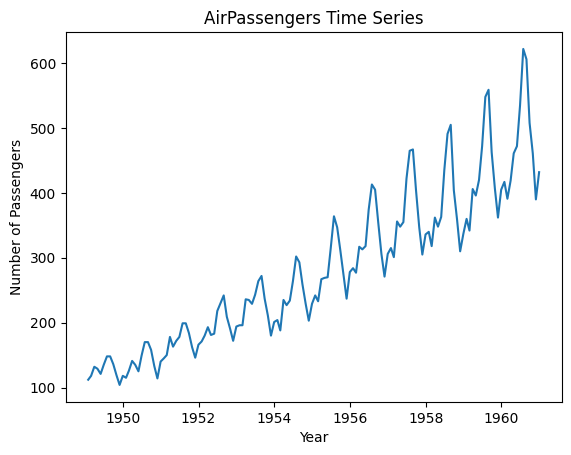

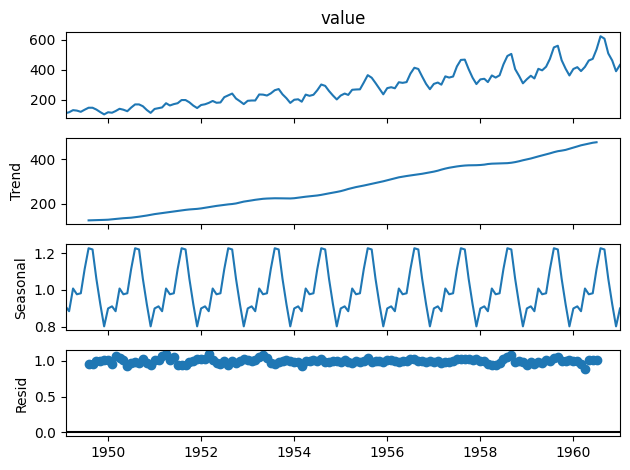

In [ ]:
#Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

data = sm.datasets.get_rdataset("AirPassengers").data

data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)

plt.figure()
plt.plot(data['value'])
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

decomposition = seasonal_decompose(data['value'], model='multiplicative')

decomposition.plot()
plt.show()



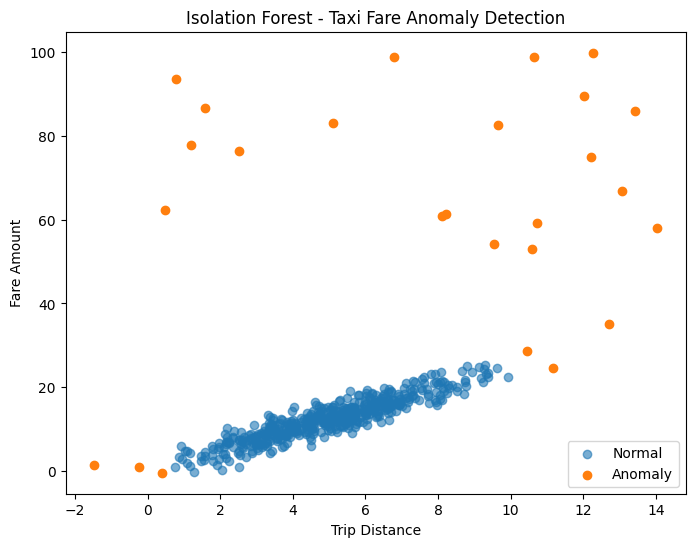

In [ ]:
# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

np.random.seed(42)

distance = np.random.normal(loc=5, scale=2, size=500)
fare = distance * 2.5 + np.random.normal(0, 2, 500)

anomaly_distance = np.random.uniform(0, 15, 20)
anomaly_fare = np.random.uniform(50, 100, 20)

distance = np.concatenate([distance, anomaly_distance])
fare = np.concatenate([fare, anomaly_fare])

df = pd.DataFrame({
    'trip_distance': distance,
    'fare_amount': fare
})

model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(df[['trip_distance', 'fare_amount']])

df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

plt.figure(figsize=(8,6))

normal = df[df['anomaly'] == 0]
anomalies = df[df['anomaly'] == 1]

plt.scatter(normal['trip_distance'], normal['fare_amount'],
            label='Normal', alpha=0.6)

plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'],
            label='Anomaly')

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest - Taxi Fare Anomaly Detection")
plt.legend()
plt.show()


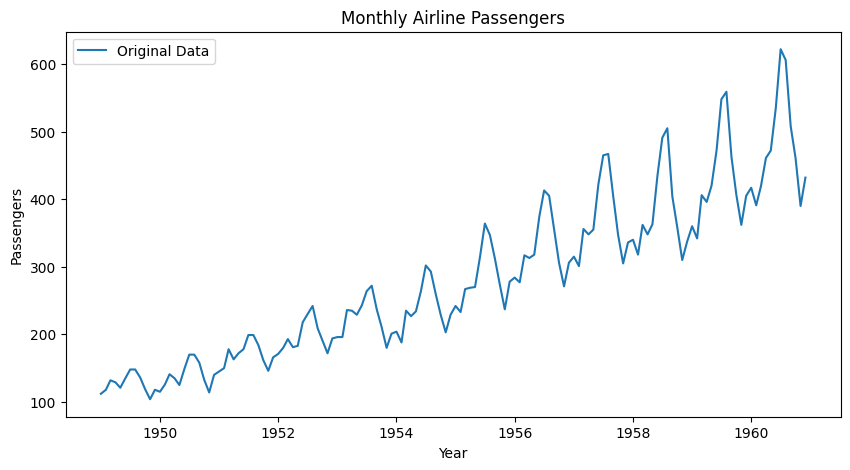

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


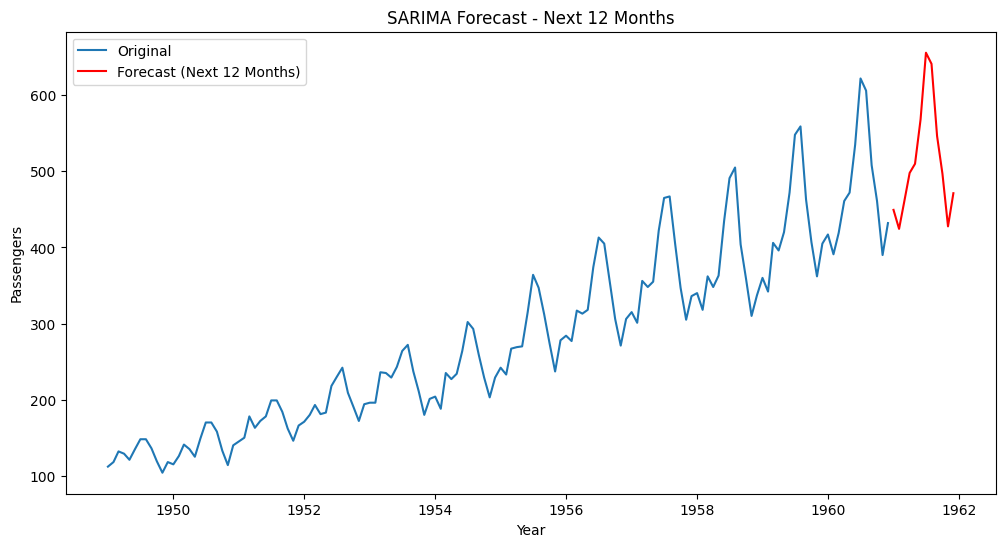

In [8]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

data.columns = ['Passengers']

plt.figure(figsize=(10,5))
plt.plot(data, label='Original Data')
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

model = SARIMAX(data['Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))

results = model.fit(disp=False)

forecast = results.forecast(steps=12)

future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1),
                             periods=12,
                             freq='MS')

forecast_series = pd.Series(forecast.values, index=future_dates)

plt.figure(figsize=(12,6))
plt.plot(data, label='Original')
plt.plot(forecast_series, label='Forecast (Next 12 Months)', color='red')
plt.title("SARIMA Forecast - Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


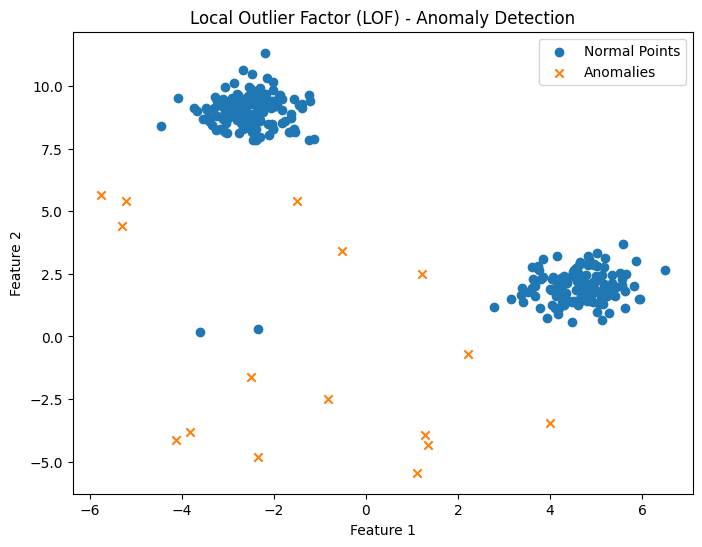

In [9]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=42)

rng = np.random.RandomState(42)
outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, outliers])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

normal = X[y_pred == 1]
anomaly = X[y_pred == -1]

plt.figure(figsize=(8,6))
plt.scatter(normal[:, 0], normal[:, 1], label='Normal Points')
plt.scatter(anomaly[:, 0], anomaly[:, 1], label='Anomalies', marker='x')
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.**

Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?


**ANS:**
1)Anomaly Detection in Streaming Data:-

Why Isolation Forest? It is highly efficient, scalable, and excels at identifying anomalies in multi-dimensional, unsupervised data by "isolating" points rather than profiling normal behavior.

Alternative (Subtle Anomalies): If anomalies are very localized and subtle, Local Outlier Factor (LOF) could be used, but it is less efficient for real-time applications.

Implementation: The model is trained on historical data and updated periodically (e.g., daily) to adapt to shifting "normal" consumption patterns. A streaming pipeline (e.g., Kafka + Spark Streaming) feeds 15-min data into the model, which outputs anomaly scores.

2)Short-Term Forecasting Model:-

SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) is the best choice.

Why SARIMAX?
15-min Frequency: This data has strong daily and weekly seasonality. SARIMA handles this explicitly.

Exogenous Factors: The dataset includes weather conditions and region. The "X" in SARIMAX allows us to incorporate these variables (e.g., temperature) to significantly improve accuracy, especially when forecasting weather-dependent demand.

Alternative: If the data exhibits non-linear, high-dimensional patterns, a LSTM-based approach (or XGBoost) could be used, but SARIMAX offers high interpretability.

3)Validation and Performance Monitoring:-

Validation: Use Walk-Forward Validation (Rolling Forecast Origin). This mimics real-time deployment by retraining the model on an expanding window of data and testing on the next immediate 15-min interval.

#Key Metrics:
Forecasting: MAPE (Mean Absolute Percentage Error) or RMSE (Root Mean Square Error).

Anomaly Detection: Precision/Recall based on labeled, historic anomalous events (if available).
Monitoring (MLOps): Use tools like Prometheus and Grafana to monitor for:

Data Drift: Changes in weather or user behavior.

Model Drift: Degradation of MAPE over time, requiring automatic retrain alerts.

4)Business Decisions and Operations:-

This solution provides significant, actionable insights:

Grid Stability: Real-time detection of spikes prevents overloads, while drop detection helps identify equipment failures (e.g., transformer failure or downed lines), minimizing downtime.

Demand Response: Accurate 15-min forecasts help utilities manage peak loads by activating demand response programs (e.g., notifying industrial users to reduce consumption).

Optimal Dispatch: The system helps grid operators balance renewable energy volatility (e.g., sudden drop in solar) with traditional power generation, reducing reliance on costly, inefficient peaker plants.

Energy Trading: Precise forecasts allow energy companies to optimize buying/selling in the real-time energy market, maximizing profitability and reducing imbalance costs.
